## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?


In [301]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

지정된 경로를 찾을 수 없습니다.


In [302]:
### 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import plaidml.keras
plaidml.keras.install_backend()

# df = pd.concat(pd.read_csv(archive.open(filename)) for filename in archive.namelist())

In [303]:
df = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/Jobis_3o3.csv')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [305]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [306]:
df.head(10)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
5,39.0,F,2015,546000.0,12800.0,True,NaN,3628000.0,213000.0
6,40.0,F,2019,4000.0,400.0,True,11512000.0,24000.0,NaN
7,23.0,M,2017,10000.0,400.0,True,186000.0,74000.0,NaN
8,54.0,M,2016,1847000.0,73100.0,False,18728000.0,NaN,2841000.0
9,22.0,M,2018,51000.0,900.0,False,NaN,NaN,153000.0


In [307]:
## 환급금 마이너스 제거
### 환급금이 마이너스 일 경우 수수료를 받지 않는 삼쩜삼 서비스 특성 고려
min_list = df[df['refund']<0].index.tolist()
df = df[~df.index.isin(min_list)]
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [308]:
df.fillna(0, inplace=True)

In [309]:
# gender 컬럼 데이터 값 변환
# 남자는 0, 여자는 1

def make_gen_bin(sent):
  if sent == 'M':
    sent = 0
  if sent == 'F':
    sent = 1
  return sent
df['gender'] = df['gender'].apply(lambda x: make_gen_bin(x))

In [310]:
## gender - M : 0 , F : 1

## has_paid - True : 1 , False : 0
df['has_paid'] = df['has_paid'].apply(lambda x: 1 if x else 0)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0


In [311]:
## 년도별 이용자 및 결제자 확인
year15 = df[df['year']==2015].index.tolist()
year16 = df[df['year']==2016].index.tolist()
year17 = df[df['year']==2017].index.tolist()
year18 = df[df['year']==2018].index.tolist()
year19 = df[df['year']==2019].index.tolist()
year20 = df[df['year']==2020].index.tolist()

In [312]:
df15 = df[df.index.isin(year15)]
df16 = df[df.index.isin(year16)]
df17 = df[df.index.isin(year17)]
df18 = df[df.index.isin(year18)]
df19 = df[df.index.isin(year19)]
df20 = df[df.index.isin(year20)]

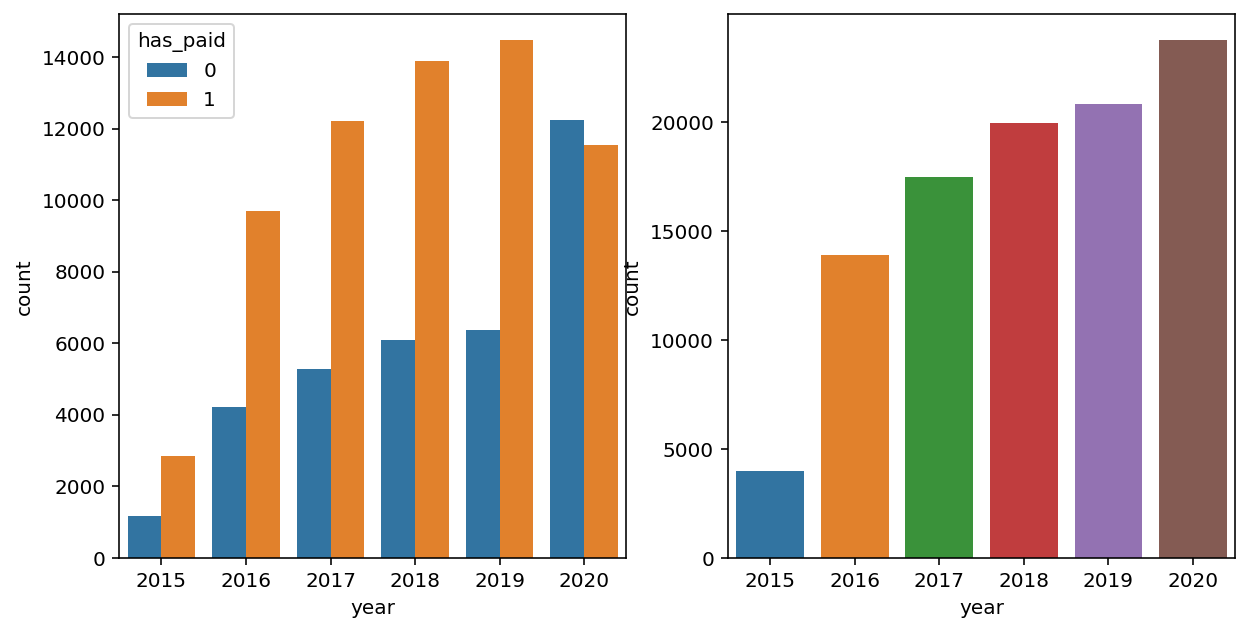

In [313]:
## 년도별 결제 및 이용자 수 그래프

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)
sns.countplot(data=df, x="year", hue='has_paid', ax=ax1)
sns.countplot(data=df, x="year", ax=ax2)
plt.show()

In [314]:
# 환급금 대비 수수료 비율
df['환급금_수수료율'] = round(df['fee']/df['refund'], 4) *100
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


In [315]:
# 근로 수입이 가장 큰 경우
emp_list = df.query('income_근로 > income_사업 and income_근로 > income_기타').index.values.tolist()
# 사업 소득이 가장 큰 경우
bus_list = df.query('income_근로 < income_사업 and income_사업 > income_기타').index.values.tolist()
# 기타 수입이 제일 큰 경우
etc_list = df.query('income_기타 > income_사업 and income_근로 < income_기타').index.values.tolist()

emp_df = df[df.index.isin(emp_list)]
bus_df = df[df.index.isin(bus_list)]
etc_df = df[df.index.isin(etc_list)]


In [316]:
print(len(emp_list), '\t', len(bus_list), '\t', len(etc_list))
print(len(emp_list) + len(bus_list) + len(etc_list))

33311 	 49385 	 8009
90705


In [317]:
## 모든 수입이 동일한 값 확인
df.query('income_근로 == income_사업 == income_기타')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77


In [318]:
## 모든 수입이 0인 값이 있는 지 확인.
df.query('income_근로 ==0 and income_사업 ==0 and income_기타==0')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77


In [319]:
(len(emp_list)+ len(bus_list) +len(etc_list)) + len(df.query('income_근로 ==0 and income_사업 ==0 and income_기타==0').index.unique().tolist())

99931

In [320]:
## 모든 수입이 동일한 값 확인
df.query('income_근로 == income_사업 == income_기타')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77


In [321]:
## 모든 소득이 동일 and 소득이 0
no_list = list(set(emp_list) | set(bus_list) | set(etc_list))
no_df = df[~df.index.isin(no_list)]

print(df.query('income_근로 == income_사업 == income_기타 and income_근로 != 0').index.tolist())
## 소득이 0이 아니면서 동일한 값은 없음.

[]


In [322]:
no_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77


In [323]:
print(len(emp_list) + len(bus_list) + len(etc_list) +len(no_df))

99985


In [324]:
no_etc = no_df.query('income_근로 == income_사업 != income_기타').index.tolist()
len(no_df.query('income_근로 == income_사업 != income_기타').index)

16

In [325]:
df.query('income_근로 != income_사업 == income_기타')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
333,32.0,0,2016,85000.0,2100.0,1,9165000.0,0.0,0.0,2.47
1193,32.0,0,2019,88000.0,4300.0,1,12261000.0,0.0,0.0,4.89
1984,26.0,1,2019,4000.0,400.0,1,0.0,21000.0,21000.0,10.00
2501,26.0,1,2016,4000.0,400.0,1,2210000.0,0.0,0.0,10.00
3192,29.0,0,2018,58000.0,900.0,0,1737000.0,0.0,0.0,1.55
...,...,...,...,...,...,...,...,...,...,...
97696,23.0,0,2017,222000.0,8500.0,1,1364000.0,0.0,0.0,3.83
97913,28.0,1,2020,20000.0,400.0,0,11696000.0,43000.0,43000.0,2.00
97940,29.0,1,2018,540000.0,21300.0,0,12245000.0,0.0,0.0,3.94
98071,45.0,1,2016,62000.0,900.0,1,1542000.0,0.0,0.0,1.45


In [326]:
print(len(df.query('income_근로 != income_사업 == income_기타').index))
print(len(no_df.query('income_근로 != income_사업 == income_기타').index))
no_work = no_df.query('income_근로 != income_사업 == income_기타').index.tolist()
no_df.query('income_근로 != income_사업 == income_기타')

148
37


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
1984,26.0,1,2019,4000.0,400.0,1,0.0,21000.0,21000.0,10.00
3369,32.0,0,2018,7000.0,400.0,1,0.0,43000.0,43000.0,5.71
3864,22.0,0,2018,98000.0,1700.0,1,0.0,77000.0,77000.0,1.73
6073,48.0,0,2017,494000.0,12800.0,1,0.0,2976000.0,2976000.0,2.59
8428,25.0,0,2018,21000.0,400.0,1,0.0,128000.0,128000.0,1.90
9912,23.0,1,2018,7000.0,400.0,0,0.0,43000.0,43000.0,5.71
11636,22.0,0,2016,7000.0,400.0,1,0.0,43000.0,43000.0,5.71
21438,21.0,0,2019,7000.0,400.0,1,0.0,43000.0,43000.0,5.71
21990,21.0,1,2019,20000.0,400.0,0,0.0,119000.0,119000.0,2.00
26501,43.0,1,2017,49000.0,900.0,1,0.0,128000.0,128000.0,1.84


In [327]:
print(len(df.query('income_근로 == income_기타 != income_사업').index))
no_busi = no_df.query('income_근로 == income_기타 != income_사업').index.tolist()
no_df.query('income_근로 == income_기타 != income_사업')

38432


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
36539,25.0,0,2020,465000.0,18300.0,1,850000.0,531000.0,850000.0,3.94


In [328]:
len(no_work)+len(no_busi) + len(no_etc)

54

In [329]:
no_money = df.query('income_근로 == income_기타 == income_사업 == 0').index.tolist()

새로운 컬럼 income_cat 생성

주요 소득 군 설정  
근로:0  
사업:1  
기타:2  
근로==사업:3  
사업==기타:4  
근로==기타:5  
소득 없음:6 

In [330]:
empty = []
count = 0

from tqdm import tqdm
df['income_cat']  = 6
for i in tqdm(df.index, position=0, leave=True):
  if i in emp_list:
    df['income_cat'][i] = 0
    # print(i)
  if i in bus_list:
    df['income_cat'][i] = 1
    # print(i)
  if i in etc_list:
    df['income_cat'][i] = 2
  if i in no_work:
    df['income_cat'][i] = 3
  if i in no_busi:
    df['income_cat'][i] = 4
  if i in no_etc:
    df['income_cat'][i] = 5
  if i in no_money:
    df['income_cat'][i] = 6

100%|██████████████████████████████████████████████████████████████████████████| 99985/99985 [01:09<00:00, 1444.39it/s]


In [331]:
df[df['income_cat']==6]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87,6
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90,6
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58,6
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87,6
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25,6
...,...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28,6
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97,6
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83,6
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77,6


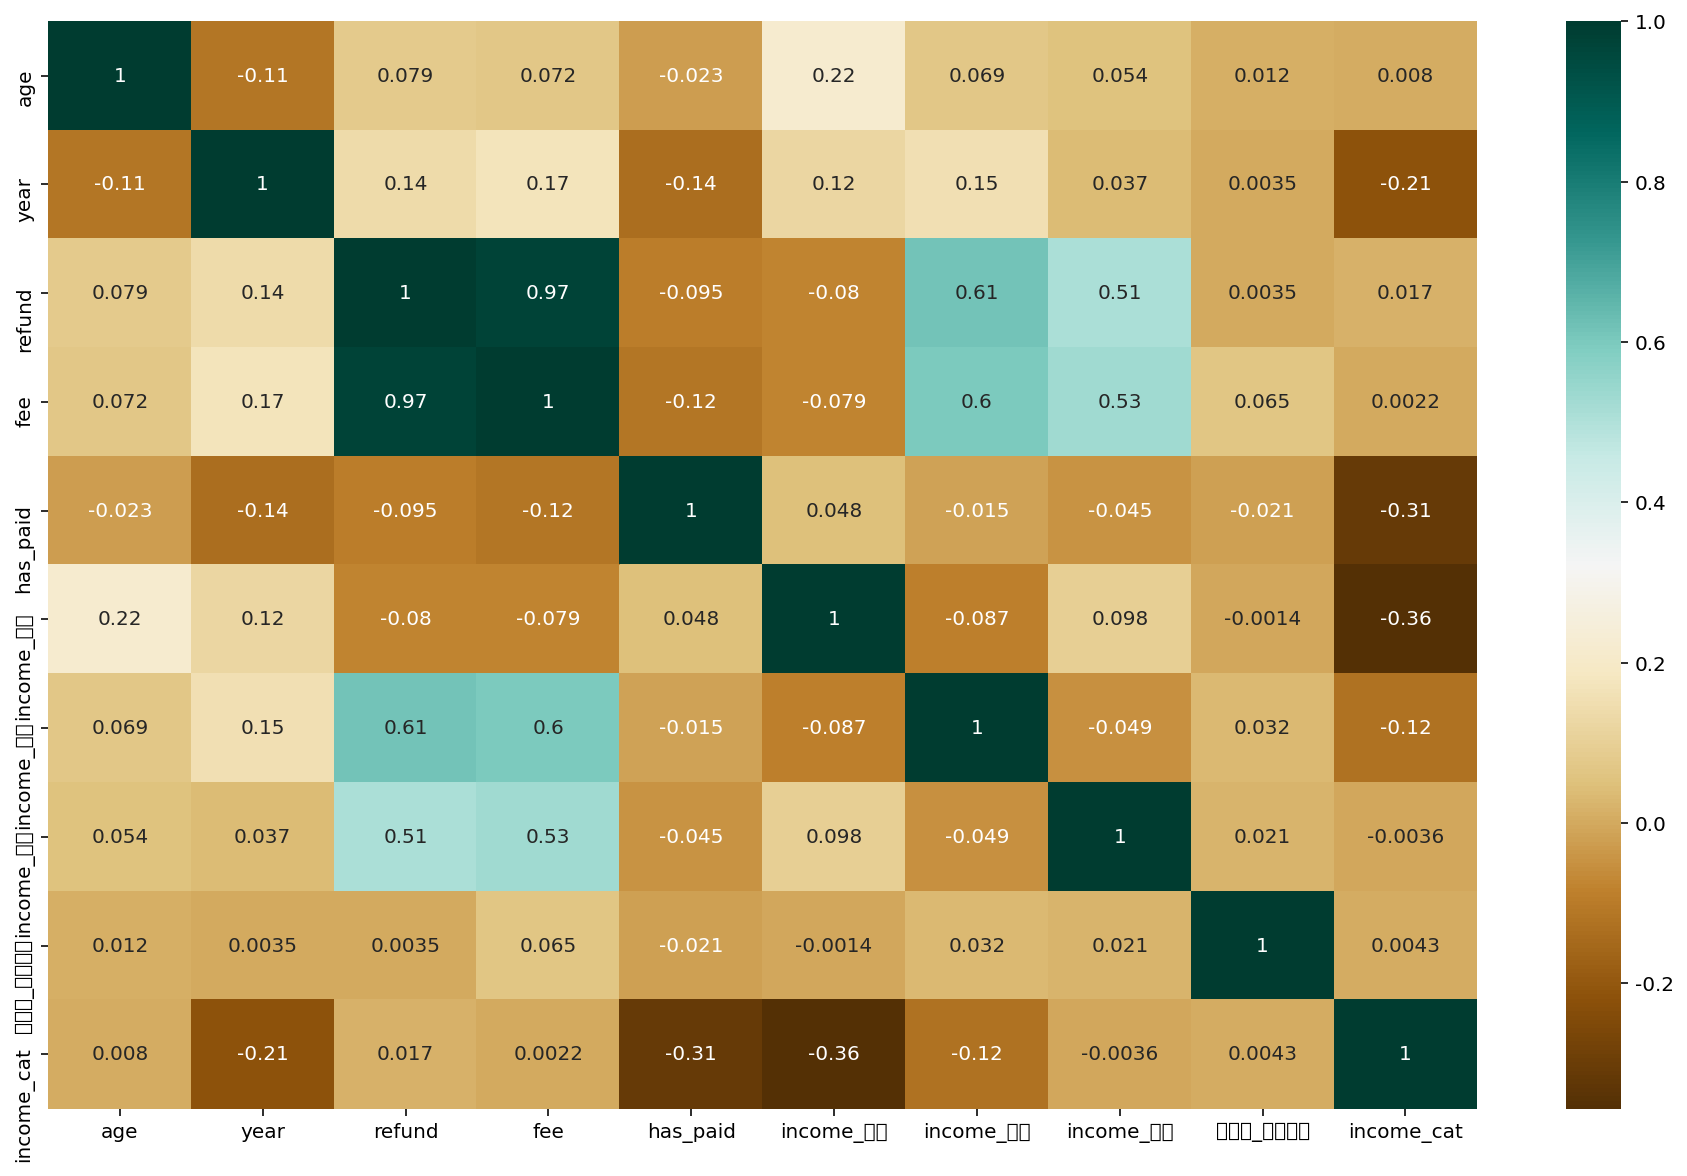

In [332]:
import matplotlib as mpl
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))
heat_df = df[['age',	'gender',	'year',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat']]
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True, )

plt.show()

In [333]:
def make_age_group(sent):
  if sent < 20 and sent >=10:
    age_group =   0
  if sent < 30 and sent >=20:
    age_group =   1
  if sent < 40 and sent >=30:
    age_group =   2
  if sent < 50 and sent >=40:
    age_group =   3
  if sent < 60 and sent >=50:
    age_group =   4
  ## 60 대 이상으로 묶기
  if sent >=60:
    age_group =   5
  
  return age_group

# 10대 0
# 20대 1
# 30대 2
# 40대 3
# 50대 4
# 60대 이상 5


In [334]:
df['age_group'] = df['age'].apply(lambda x : make_age_group(x))

In [335]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1


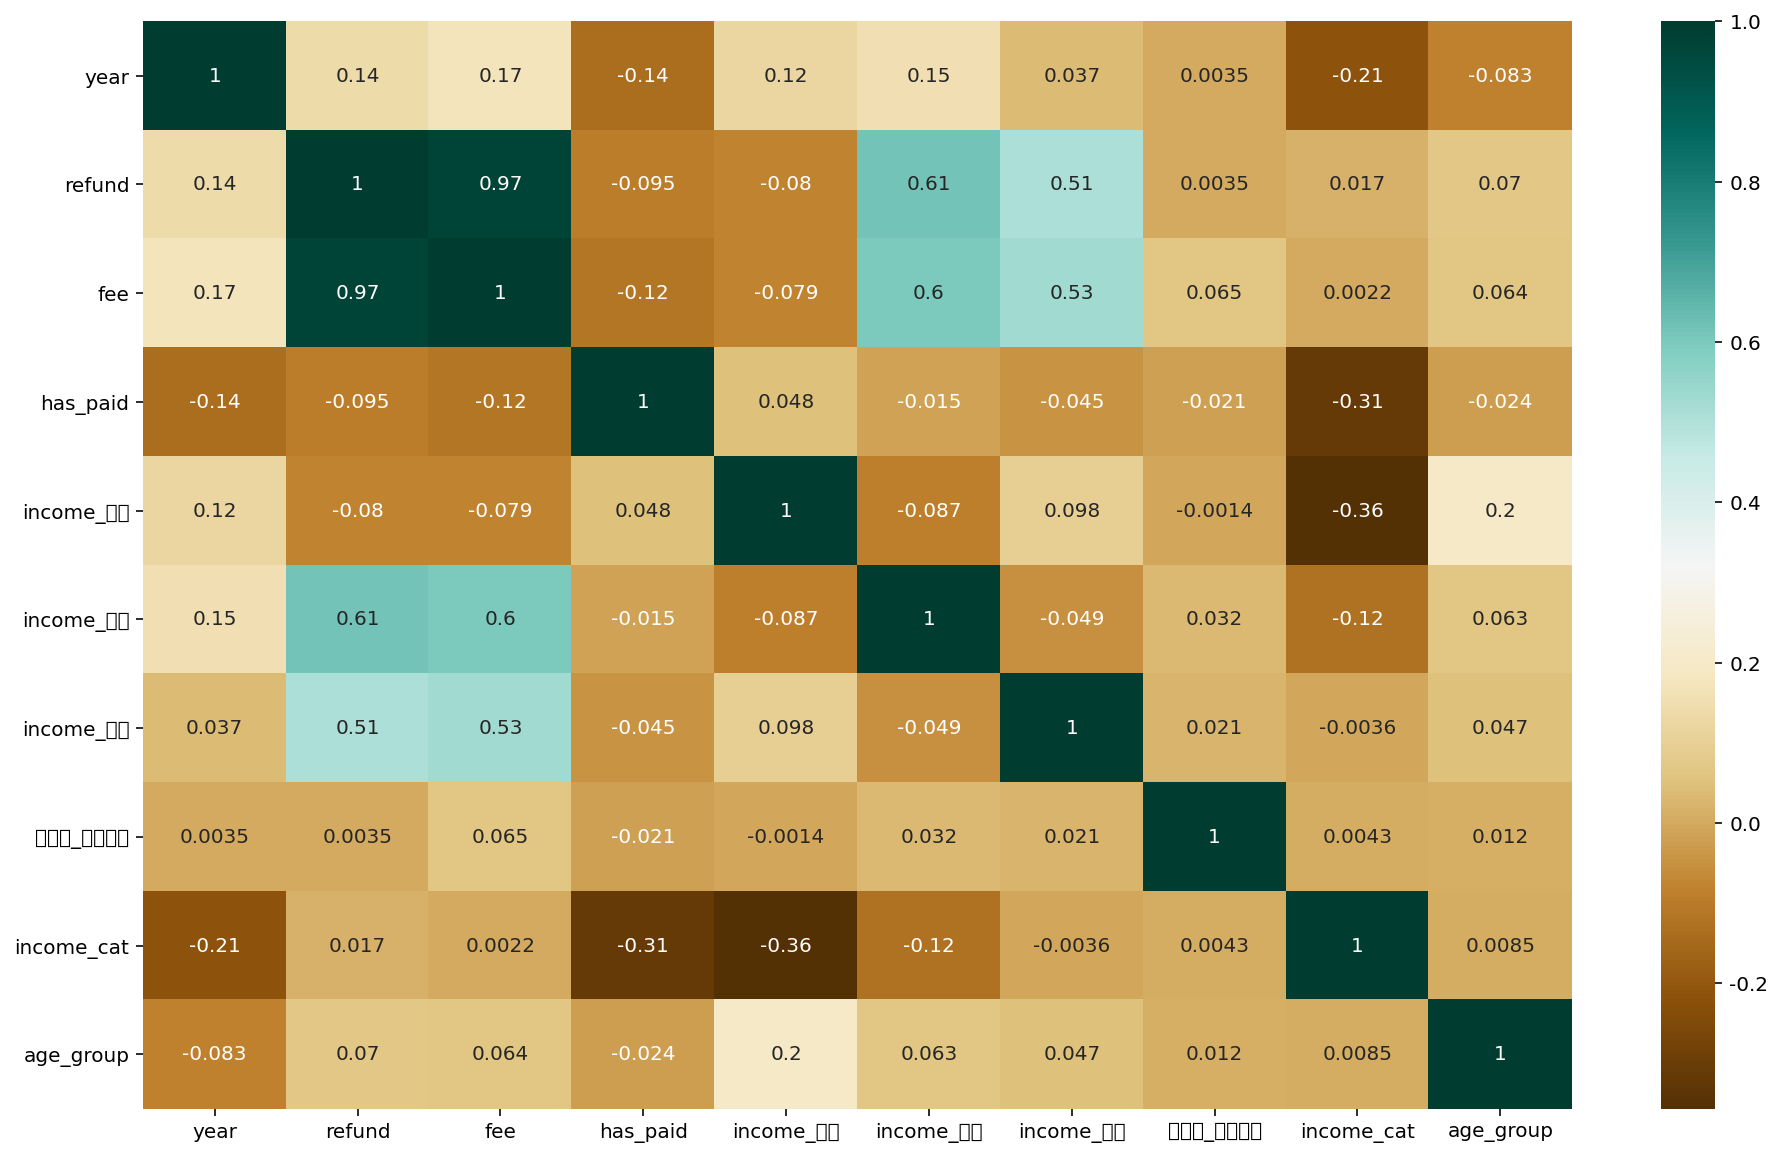

In [336]:
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))

heat_df = df[['year', 'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat', 'age_group']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )

plt.show()

In [337]:
heat_df.corr().query('has_paid > 0.3 or has_paid < -0.3')

,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
has_paid,-0.135989,-0.094561,-0.117705,1.000000,0.048340,-0.014893,-0.04480,-0.021334,-0.310759,-0.024030
income_cat,-0.214521,0.016920,0.002216,-0.310759,-0.356295,-0.124130,-0.00364,0.004297,1.000000,0.008512


In [338]:
heat_df.corr()

,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
year,1.000000,0.141646,0.169525,-0.135989,0.124567,0.153671,0.036674,0.003477,-0.214521,-0.083161
refund,0.141646,1.000000,0.973777,-0.094561,-0.079794,0.613461,0.509953,0.003479,0.016920,0.069653
fee,0.169525,0.973777,1.000000,-0.117705,-0.079482,0.601075,0.531444,0.064889,0.002216,0.063862
has_paid,-0.135989,-0.094561,-0.117705,1.000000,0.048340,-0.014893,-0.044800,-0.021334,-0.310759,-0.024030
income_근로,0.124567,-0.079794,-0.079482,0.048340,1.000000,-0.086821,0.098068,-0.001418,-0.356295,0.199159
income_사업,0.153671,0.613461,0.601075,-0.014893,-0.086821,1.000000,-0.049064,0.032293,-0.124130,0.062981
income_기타,0.036674,0.509953,0.531444,-0.044800,0.098068,-0.049064,1.000000,0.020640,-0.003640,0.047473
환급금_수수료율,0.003477,0.003479,0.064889,-0.021334,-0.001418,0.032293,0.020640,1.000000,0.004297,0.012433
income_cat,-0.214521,0.016920,0.002216,-0.310759,-0.356295,-0.124130,-0.003640,0.004297,1.000000,0.008512
age_group,-0.083161,0.069653,0.063862,-0.024030,0.199159,0.062981,0.047473,0.012433,0.008512,1.000000


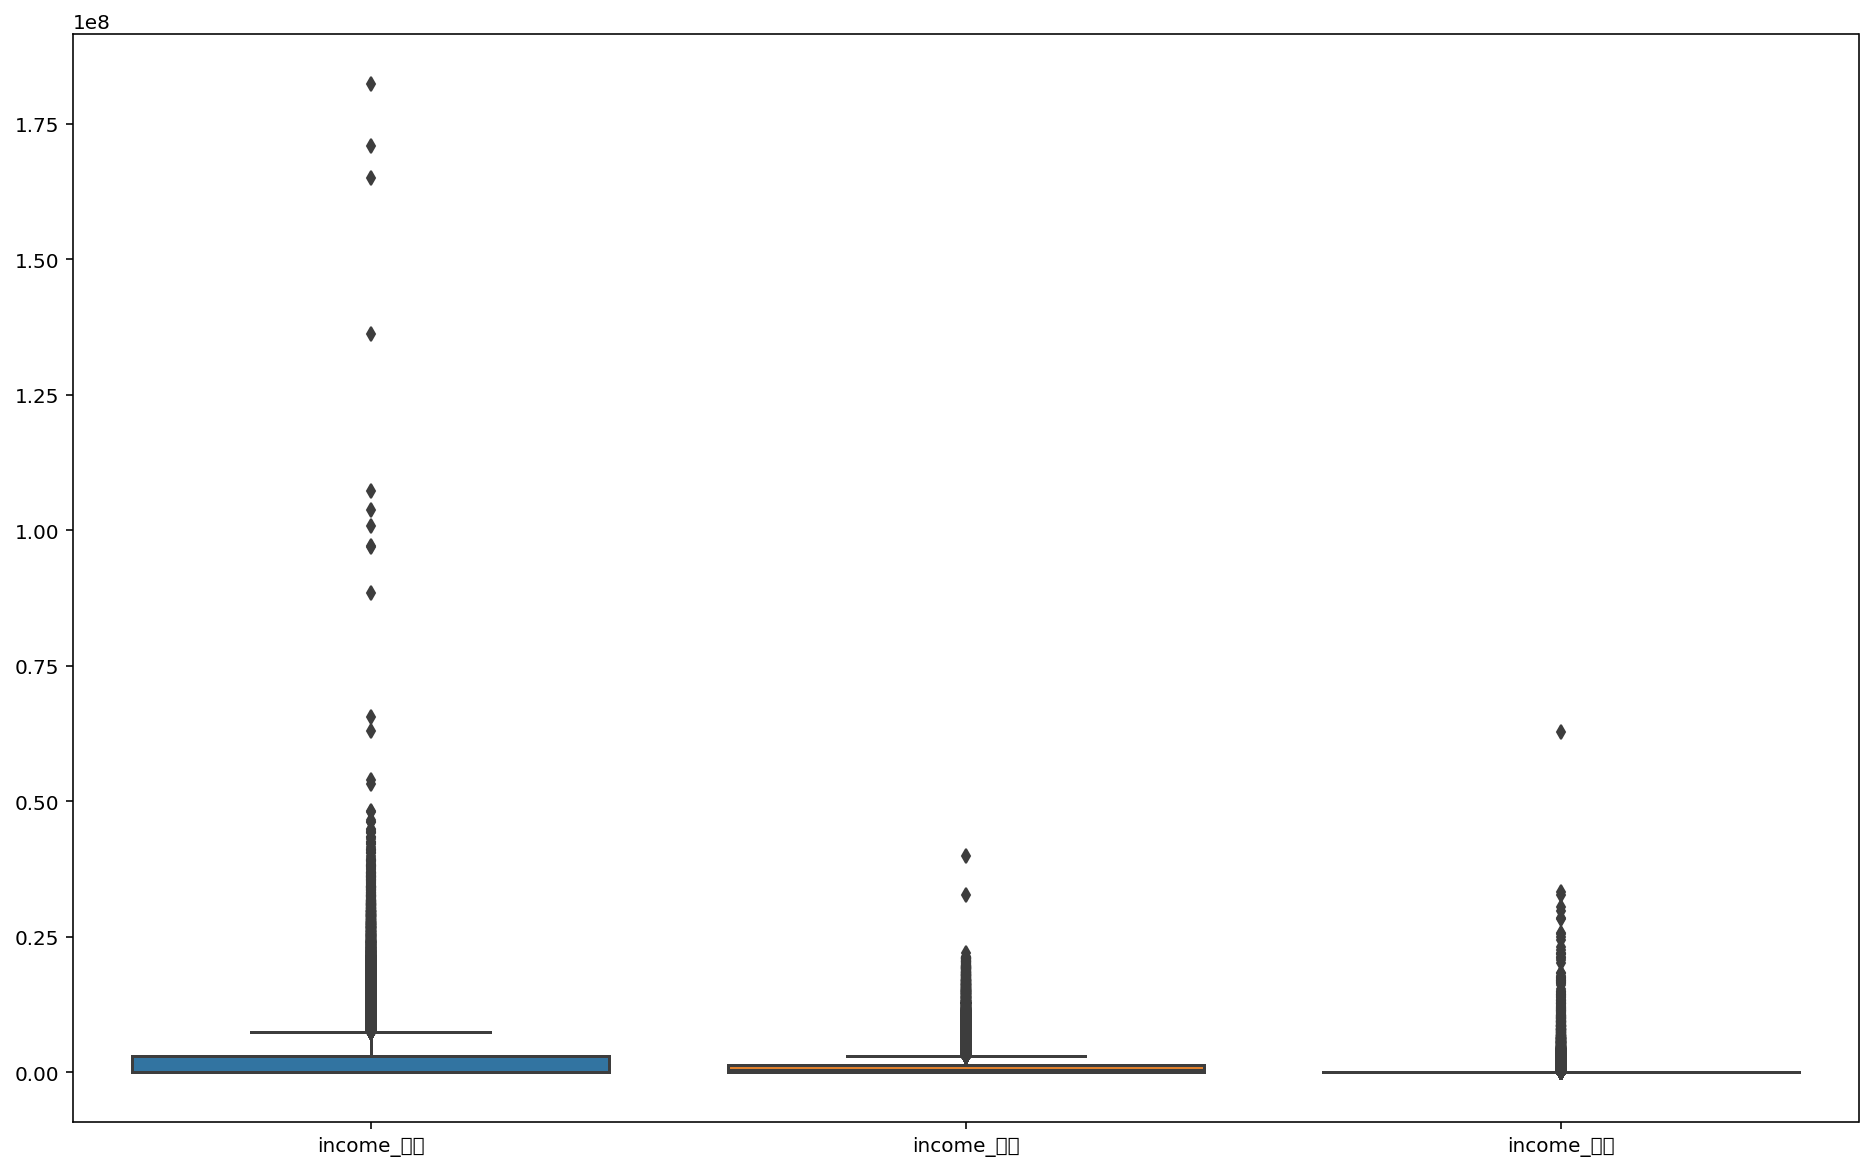

In [339]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df[['income_근로', 'income_사업', 'income_기타']])

In [340]:
df.groupby('환급금_수수료율')['fee'].sum()/df.groupby('환급금_수수료율')['fee'].count()
# df[df['fee']==400]
# df.query('income_근로 == income_사업 == income_기타 and has_paid == 0') # 1545
# df.query('income_근로 == income_사업 == income_기타') # 9226

환급금_수수료율
-inf         5383.673469
 0.56         400.000000
 0.57         400.000000
 0.58         400.000000
 0.59         400.000000
                ...     
 558.57     39100.000000
 596.00     29800.000000
 775.00     31000.000000
 1595.00    63800.000000
 inf         1400.000000
Name: fee, Length: 934, dtype: float64

In [341]:
no_pay = df[df['has_paid']==1].index.tolist()
paid_df = df[~df.index.isin(no_pay)]
nopay_df = df[df.index.isin(no_pay)]
paid_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1
8,54.0,0,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96,0,4
9,22.0,0,2018,51000.0,900.0,0,0.0,0.0,153000.0,1.76,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97,6,1
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83,6,3
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77,6,1
99993,32.0,1,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00,0,2


In [342]:
paid_df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
count,35349.000000,35349.000000,3.534900e+04,35349.000000,35349.0,3.534900e+04,3.534900e+04,3.534900e+04,35349.00,35349.000000,35349.000000
mean,29.241167,2018.386376,2.474332e+05,9146.391694,0.0,2.279123e+06,1.227941e+06,2.089531e+05,-inf,1.897677,1.468104
std,7.877731,1.528286,3.791277e+05,15078.514737,0.0,5.000934e+06,2.563313e+06,1.005001e+06,NaN,2.235074,0.813163
min,16.000000,2015.000000,-0.000000e+00,400.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000,0.000000
25%,24.000000,2017.000000,2.800000e+04,400.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.00,0.000000,1.000000
50%,27.000000,2019.000000,1.100000e+05,4300.000000,0.0,0.000000e+00,1.150000e+05,0.000000e+00,3.84,1.000000,1.000000
75%,32.000000,2020.000000,3.040000e+05,11500.000000,0.0,1.843000e+06,1.166000e+06,0.000000e+00,3.96,2.000000,2.000000
max,78.000000,2020.000000,7.608000e+06,302300.000000,0.0,1.648830e+08,2.122400e+07,6.281000e+07,426.67,6.000000,5.000000


In [343]:
len(no_pay)

64636

In [344]:
### 연령대 별 구분
print('10대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비율 {}%'.format(len(df.query('age_group == 0 and has_paid == 0')), round(len(df.query('age_group == 0 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 0 and has_paid == 0'))/len(paid_df.index),4)*100 ))
print('20대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 1 and has_paid == 0')), round(len(df.query('age_group == 1 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 1 and has_paid == 0'))/len(paid_df.index),4)*100 ))
print('30대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 2 and has_paid == 0')), round(len(df.query('age_group == 2 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 2 and has_paid == 0'))/len(paid_df),4)*100 ))
print('40대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 3 and has_paid == 0')), round(len(df.query('age_group == 3 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 3 and has_paid == 0'))/len(paid_df.index),4)*100 ))
print('50대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 4 and has_paid == 0')), round(len(df.query('age_group == 4 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 4 and has_paid == 0'))/len(paid_df.index),4)*100 ))
print('60대 이상, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 5 and has_paid == 0')), round(len(df.query('age_group == 5 and has_paid == 0'))/len(df.index),4)*100, round(len(df.query('age_group == 5 and has_paid == 0'))/len(paid_df.index),4)*100 ))


10대, 결제한 사람은 393 명 전체 이용한 사람대비 비율은 0.38999999999999996 % 결제한 사람 대비율 1.11%
20대, 결제한 사람은 23212 명 전체 이용한 사람대비 비율은 23.22 % 결제한 사람 대비 비율은 65.67 %
30대, 결제한 사람은 8078 명 전체 이용한 사람대비 비율은 8.08 % 결제한 사람 대비 비율은 22.85 %
40대, 결제한 사람은 2303 명 전체 이용한 사람대비 비율은 2.3 % 결제한 사람 대비 비율은 6.52 %
50대, 결제한 사람은 1196 명 전체 이용한 사람대비 비율은 1.2 % 결제한 사람 대비 비율은 3.38 %
60대 이상, 결제한 사람은 167 명 전체 이용한 사람대비 비율은 0.16999999999999998 % 결제한 사람 대비 비율은 0.47000000000000003 %


In [345]:
### 이용자의 연령대별 구분
print('10대 이용자 수는 ',len(df.query('age_group==0')),'\t10대 이용자 비율',round(len(df.query('age_group==0'))/len(df), 4)*100)
print('20대 이용자 수는 ',len(df.query('age_group==1')),'\t20대 이용자 비율',round(len(df.query('age_group==1'))/len(df), 4)*100)
print('30대 이용자 수는 ',len(df.query('age_group==2')),'\t30대 이용자 비율',round(len(df.query('age_group==2'))/len(df), 4)*100)
print('40대 이용자 수는 ',len(df.query('age_group==3')),'\t40대 이용자 비율',round(len(df.query('age_group==3'))/len(df), 4)*100)
print('50대 이용자 수는 ',len(df.query('age_group==4')),'\t50대 이용자 비율',round(len(df.query('age_group==4'))/len(df), 4)*100)
print('60대 이용자 수는 ',len(df.query('age_group==5')),'\t60대 이상 이용자 비율',round(len(df.query('age_group==5'))/len(df), 4)*100)


10대 이용자 수는  1279 	10대 이용자 비율 1.28
20대 이용자 수는  66973 	20대 이용자 비율 66.97999999999999
30대 이용자 수는  22173 	30대 이용자 비율 22.18
40대 이용자 수는  5905 	40대 이용자 비율 5.91
50대 이용자 수는  3123 	50대 이용자 비율 3.1199999999999997
60대 이용자 수는  532 	60대 이상 이용자 비율 0.53


In [346]:
len(df.query('age_group == 1 and has_paid == 1'))/len(df.query('age_group == 1'))

0.6534125692443223

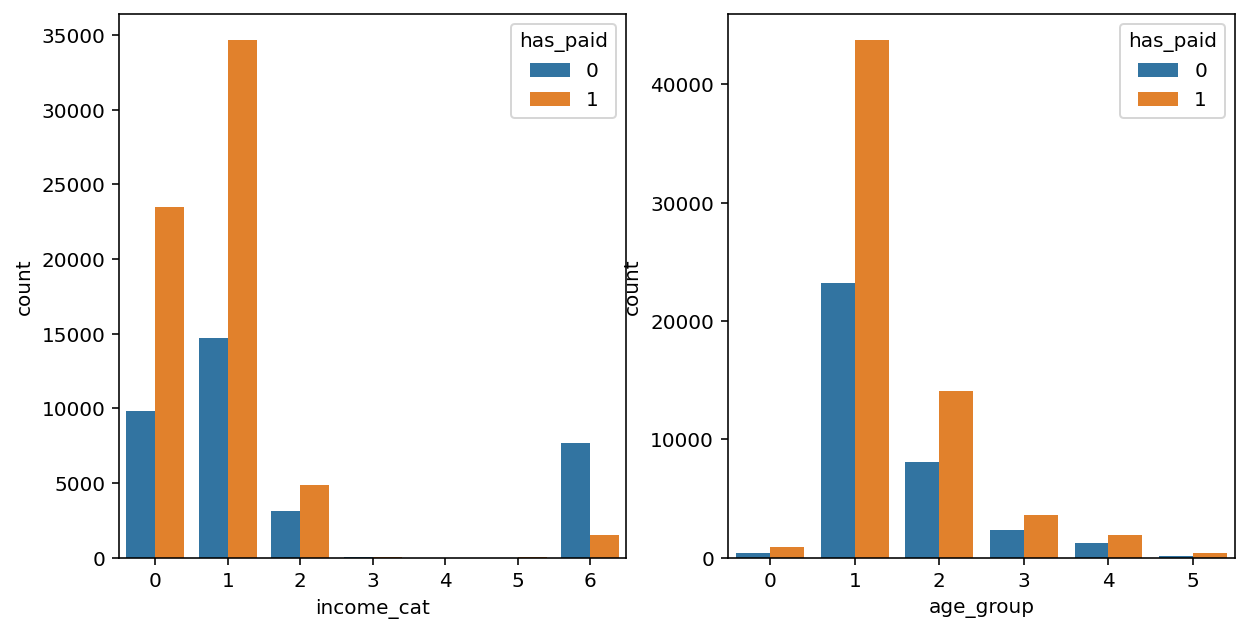

In [347]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)

sns.countplot(data=df, x="income_cat", hue='has_paid', ax=ax1)
sns.countplot(data=df, x="age_group", hue='has_paid', ax=ax2)

plt.show()

In [348]:
print(len(df[df['has_paid']==True])+ len(df[df['has_paid']==False]))
print(len(df[df['has_paid']==True]))
print('남자 결제 인원',len(df.query('gender == 0 and has_paid == 0')))
print('여자 결제 인원',len(df.query('gender == 1 and has_paid == 0')))


99985
64636
남자 결제 인원 17221
여자 결제 인원 18110


Text(0.5, 1.0, '성별 0:남자, 1:여자')

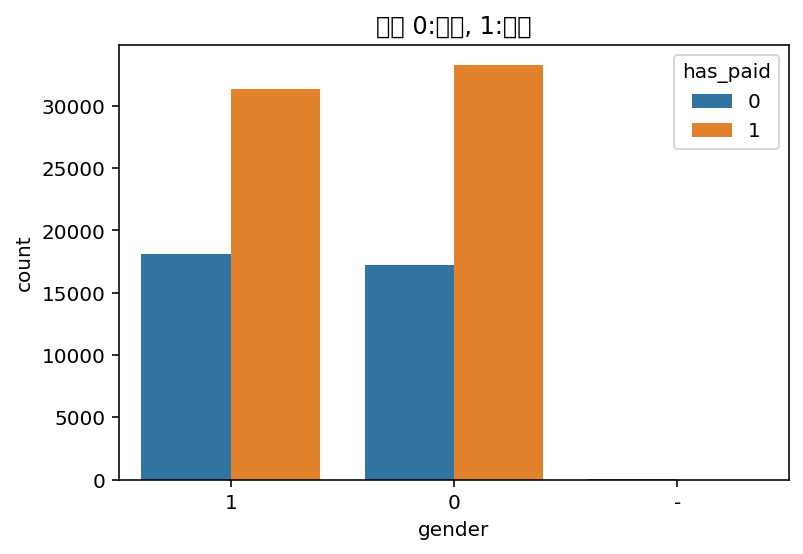

In [349]:
sns.countplot(data = df, x='gender', hue='has_paid').set_title('성별 0:남자, 1:여자')

In [350]:
## 성별이 없는 데이터들
df[df['gender'] == '-']

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
2613,27.0,-,2016,559000.0,12800.0,0,0.0,0.0,0.0,2.29,6,1
4101,27.0,-,2017,209000.0,4300.0,0,0.0,0.0,0.0,2.06,6,1
9574,42.0,-,2015,175000.0,4300.0,0,0.0,0.0,0.0,2.46,6,3
20536,26.0,-,2017,845000.0,25100.0,0,0.0,0.0,0.0,2.97,6,1
28211,26.0,-,2016,650000.0,12800.0,0,0.0,0.0,0.0,1.97,6,1
36217,27.0,-,2018,124000.0,3400.0,0,0.0,0.0,0.0,2.74,6,1
37674,27.0,-,2015,252000.0,8500.0,0,0.0,0.0,0.0,3.37,6,1
38223,53.0,-,2015,6000.0,400.0,0,0.0,0.0,0.0,6.67,6,4
38441,23.0,-,2018,110000.0,3000.0,0,0.0,0.0,0.0,2.73,6,1
41454,41.0,-,2015,122000.0,4300.0,1,0.0,0.0,0.0,3.52,6,3


In [351]:
len(df[df['gender']==0]) + len(df[df['gender']==1])

99963

In [352]:
print('성별이 없는 데이터',len(df.query('gender == "-"')))
# print('성별이 없는 결제',len(df.query('gender == "-" and has_paid == 0')))
# print('결제율',len(df.query('gender == "-" and has_paid == 0'))/ len(df.query('gender == "-"'))*100)
## 성별과 결제율은 의미가 없으므로 굳이 drop하지 않아도 될 것으로 보임

성별이 없는 데이터 22


In [353]:
df.query('환급금_수수료율 >= 10 and refund > 4000 and has_paid == 0')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
627,29.0,0,2017,8000.0,900.0,0,285000.0,47000.0,379000.0,11.25,2,1
1458,31.0,1,2016,18000.0,4300.0,0,10945000.0,111000.0,213000.0,23.89,0,2
1723,28.0,0,2018,99000.0,42500.0,0,10662000.0,13380000.0,0.0,42.93,1,1
3101,23.0,1,2019,9000.0,4700.0,0,0.0,54000.0,397000.0,52.22,2,1
3312,38.0,0,2019,94000.0,42500.0,0,0.0,0.0,0.0,45.21,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95974,26.0,0,2018,79000.0,40000.0,0,0.0,476000.0,1519000.0,50.63,2,1
96891,23.0,1,2017,11000.0,1700.0,0,0.0,64000.0,410000.0,15.45,2,1
96990,29.0,1,2017,203000.0,62500.0,0,4236000.0,1224000.0,1680000.0,30.79,0,1
97609,25.0,1,2020,5000.0,5500.0,0,1530000.0,839000.0,0.0,110.00,0,1


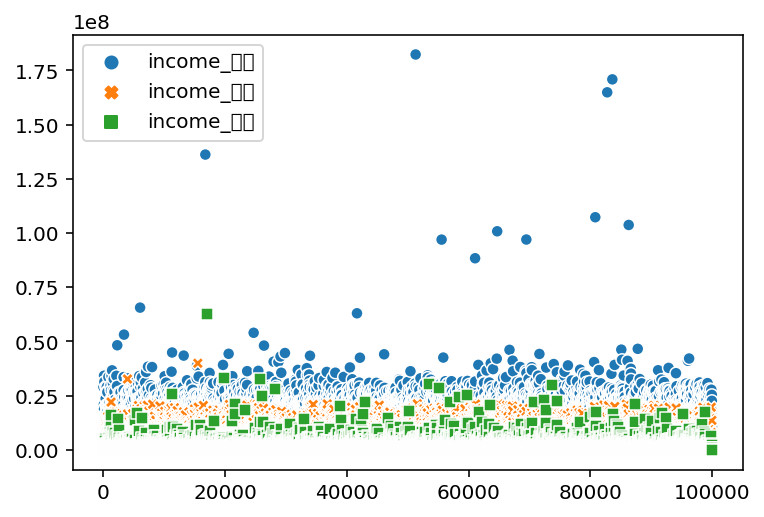

In [354]:
sns.scatterplot(data=df[['income_근로', 'income_사업', 'income_기타']])

In [355]:
df['income'] = df['income_근로'] + df['income_사업'] + df['income_기타']
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0


In [356]:
df.query('income == 0 and has_paid == 0 and 환급금_수수료율 > 10')
### 90988  수수료율 128 %, 환급금에 비해 수수료가 비싼데 결제함...??

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income
3312,38.0,0,2019,94000.0,42500.0,0,0.0,0.0,0.0,45.21,6,2,0.0
11779,47.0,0,2016,17000.0,12800.0,0,0.0,0.0,0.0,75.29,6,3,0.0
16651,34.0,0,2018,90000.0,63800.0,0,0.0,0.0,0.0,70.89,6,2,0.0
17524,34.0,0,2018,104000.0,21300.0,0,0.0,0.0,0.0,20.48,6,2,0.0
23526,27.0,0,2019,38000.0,8500.0,0,0.0,0.0,0.0,22.37,6,1,0.0
31095,37.0,1,2016,69000.0,12800.0,0,0.0,0.0,0.0,18.55,6,2,0.0
38606,56.0,1,2019,93000.0,12800.0,0,0.0,0.0,0.0,13.76,6,4,0.0
42450,44.0,1,2019,24000.0,12800.0,0,0.0,0.0,0.0,53.33,6,3,0.0
42989,28.0,0,2019,18000.0,4300.0,0,0.0,0.0,0.0,23.89,6,1,0.0
43873,32.0,1,2018,103000.0,12800.0,0,0.0,0.0,0.0,12.43,6,2,0.0


In [357]:
### 소득 0// 결제 인원
print(len(df.query('income == 0 and has_paid == 0')))
### 소득 0// 결제 인원 중 수수료율 10이하
print('수수료율 10이하',len(df.query('income == 0 and has_paid == 0 and 환급금_수수료율 <= 10')))

7681
수수료율 10이하 7655


In [358]:
df.query('환급금_수수료율 > 10')['refund'].describe()

count       453.000000
mean      39008.830022
std       61883.060656
min           0.000000
25%        4000.000000
50%       18000.000000
75%       48000.000000
max      529000.000000
Name: refund, dtype: float64

In [359]:
df.query('has_paid == 0 and 환급금_수수료율 <= 10')
### 대부분 수수료율은 10 % 이하

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0
8,54.0,0,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96,0,4,21569000.0
9,22.0,0,2018,51000.0,900.0,0,0.0,0.0,153000.0,1.76,2,1,153000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97,6,1,0.0
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83,6,3,0.0
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77,6,1,0.0
99993,32.0,1,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00,0,2,7364000.0


In [360]:
df.query('has_paid == 0 and 환급금_수수료율 == 10 and fee != 400')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income


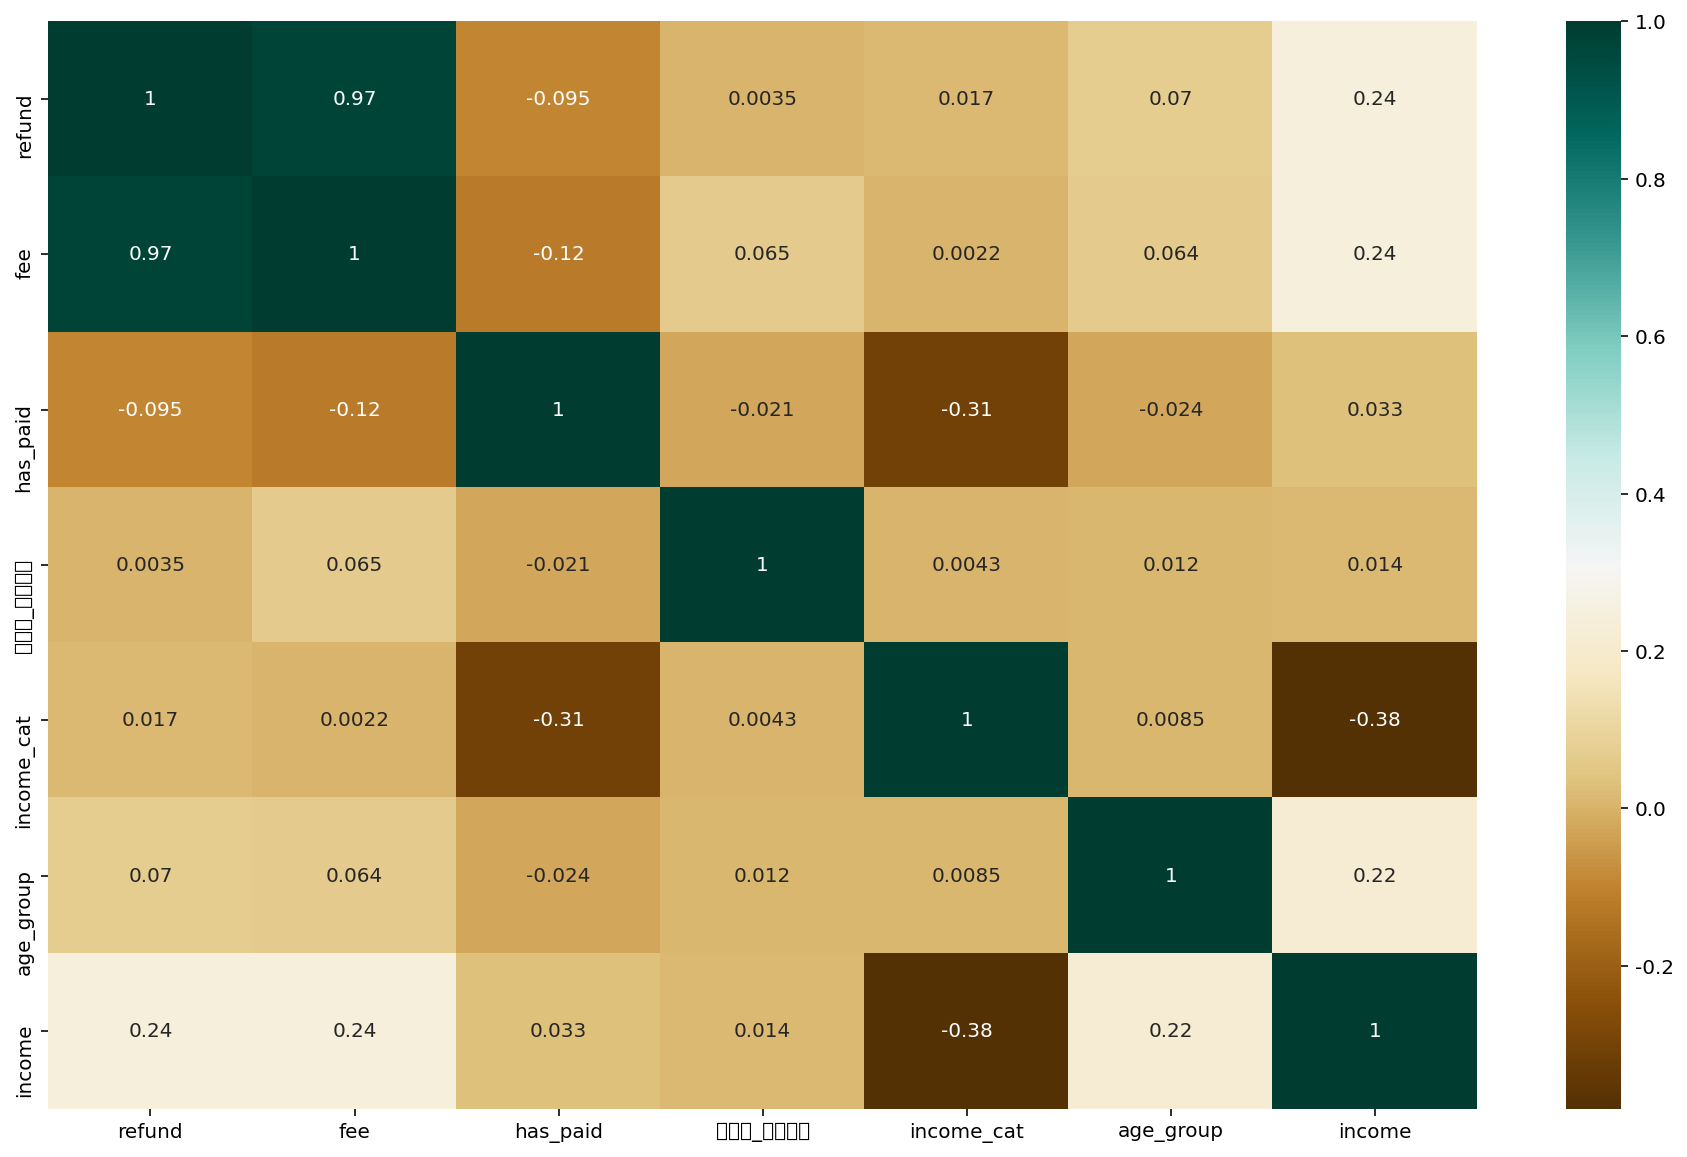

In [361]:
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))

heat_df = df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율',	'income_cat', 'age_group', 'income']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )

plt.show()

In [362]:
emp_df = df[df.index.isin(emp_list)]
bus_df = df[df.index.isin(bus_list)]
etc_df = df[df.index.isin(etc_list)]

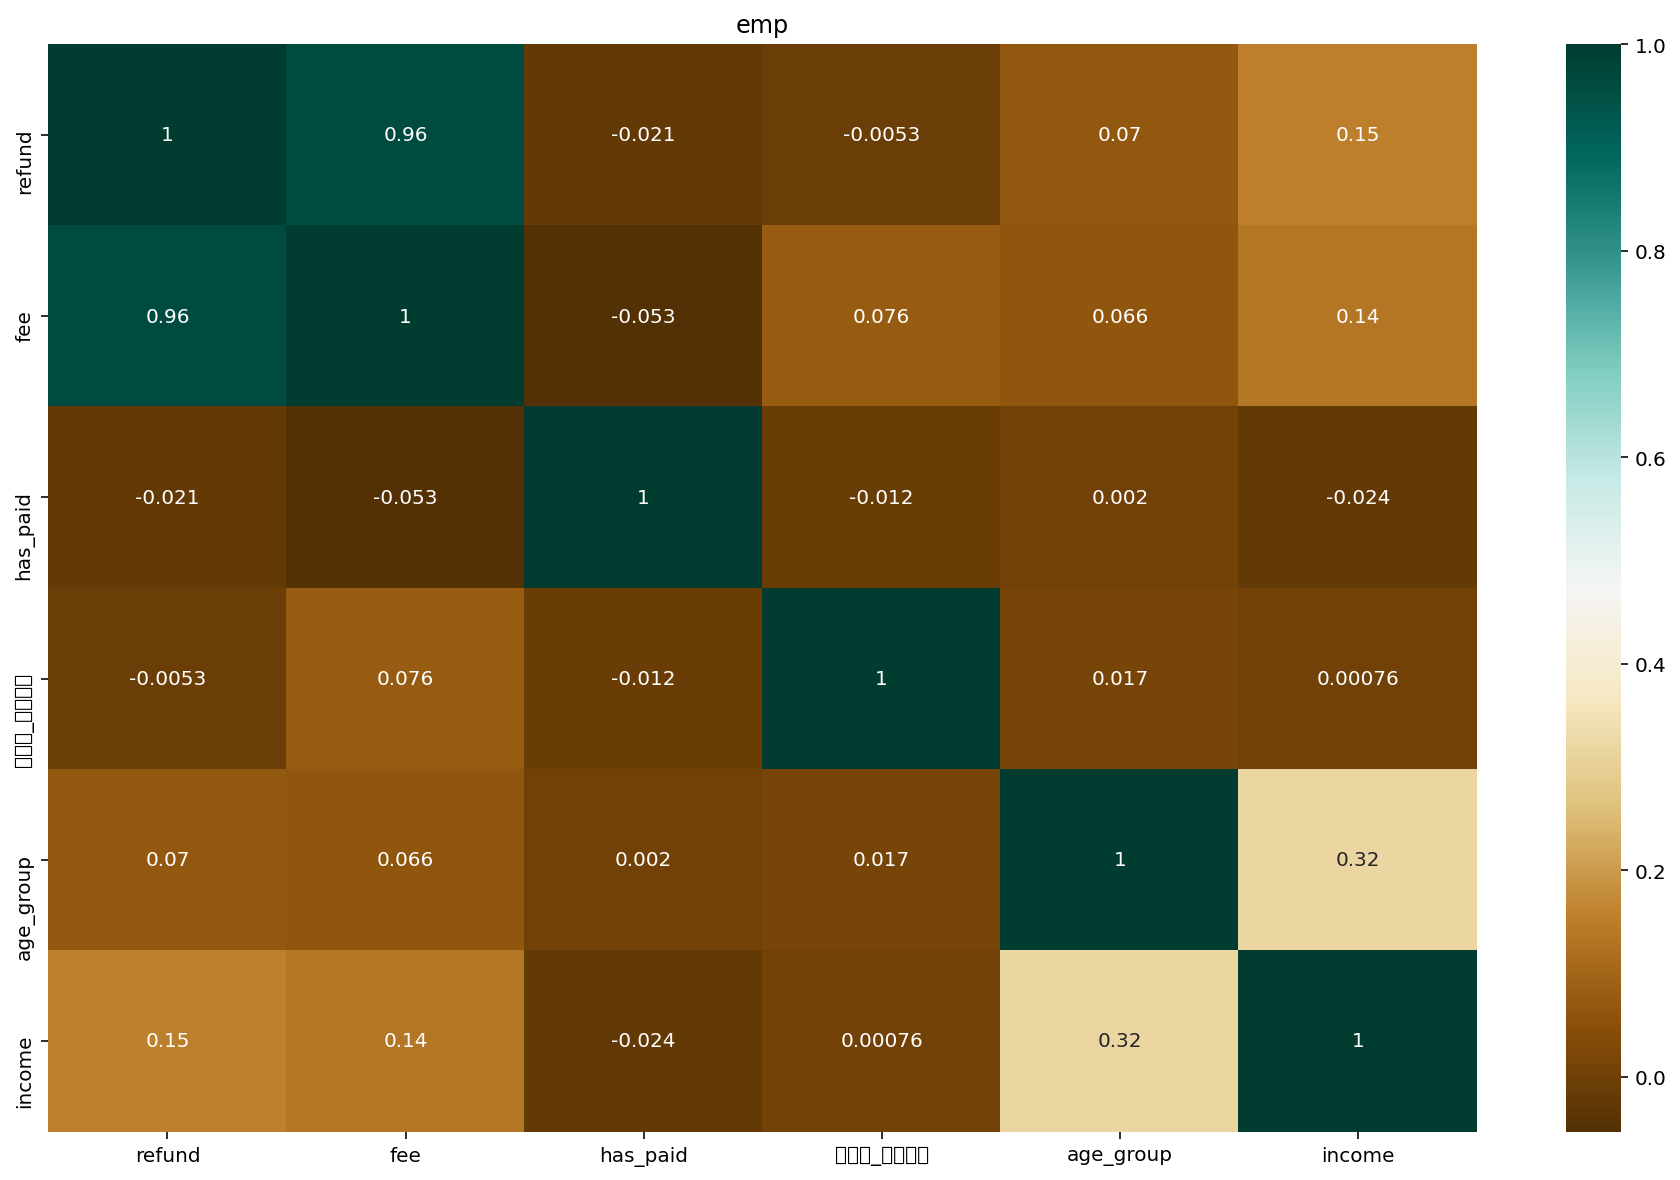

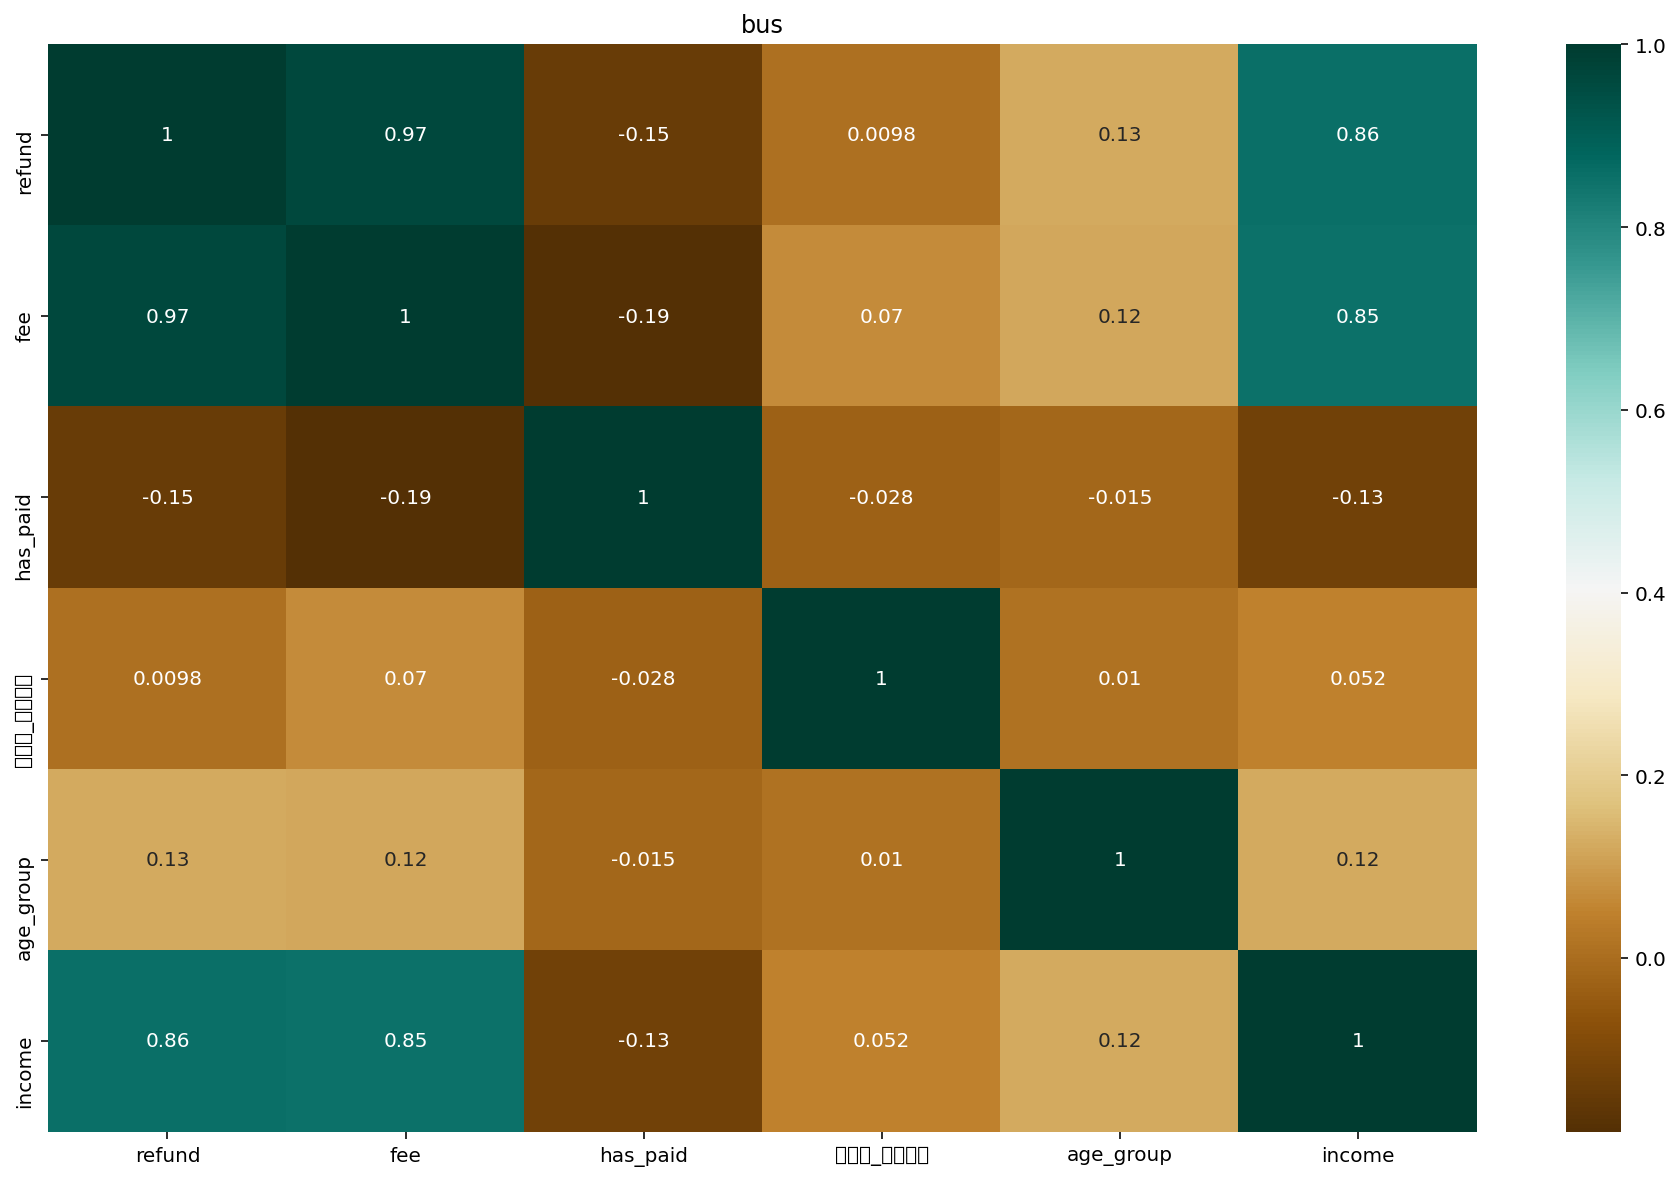

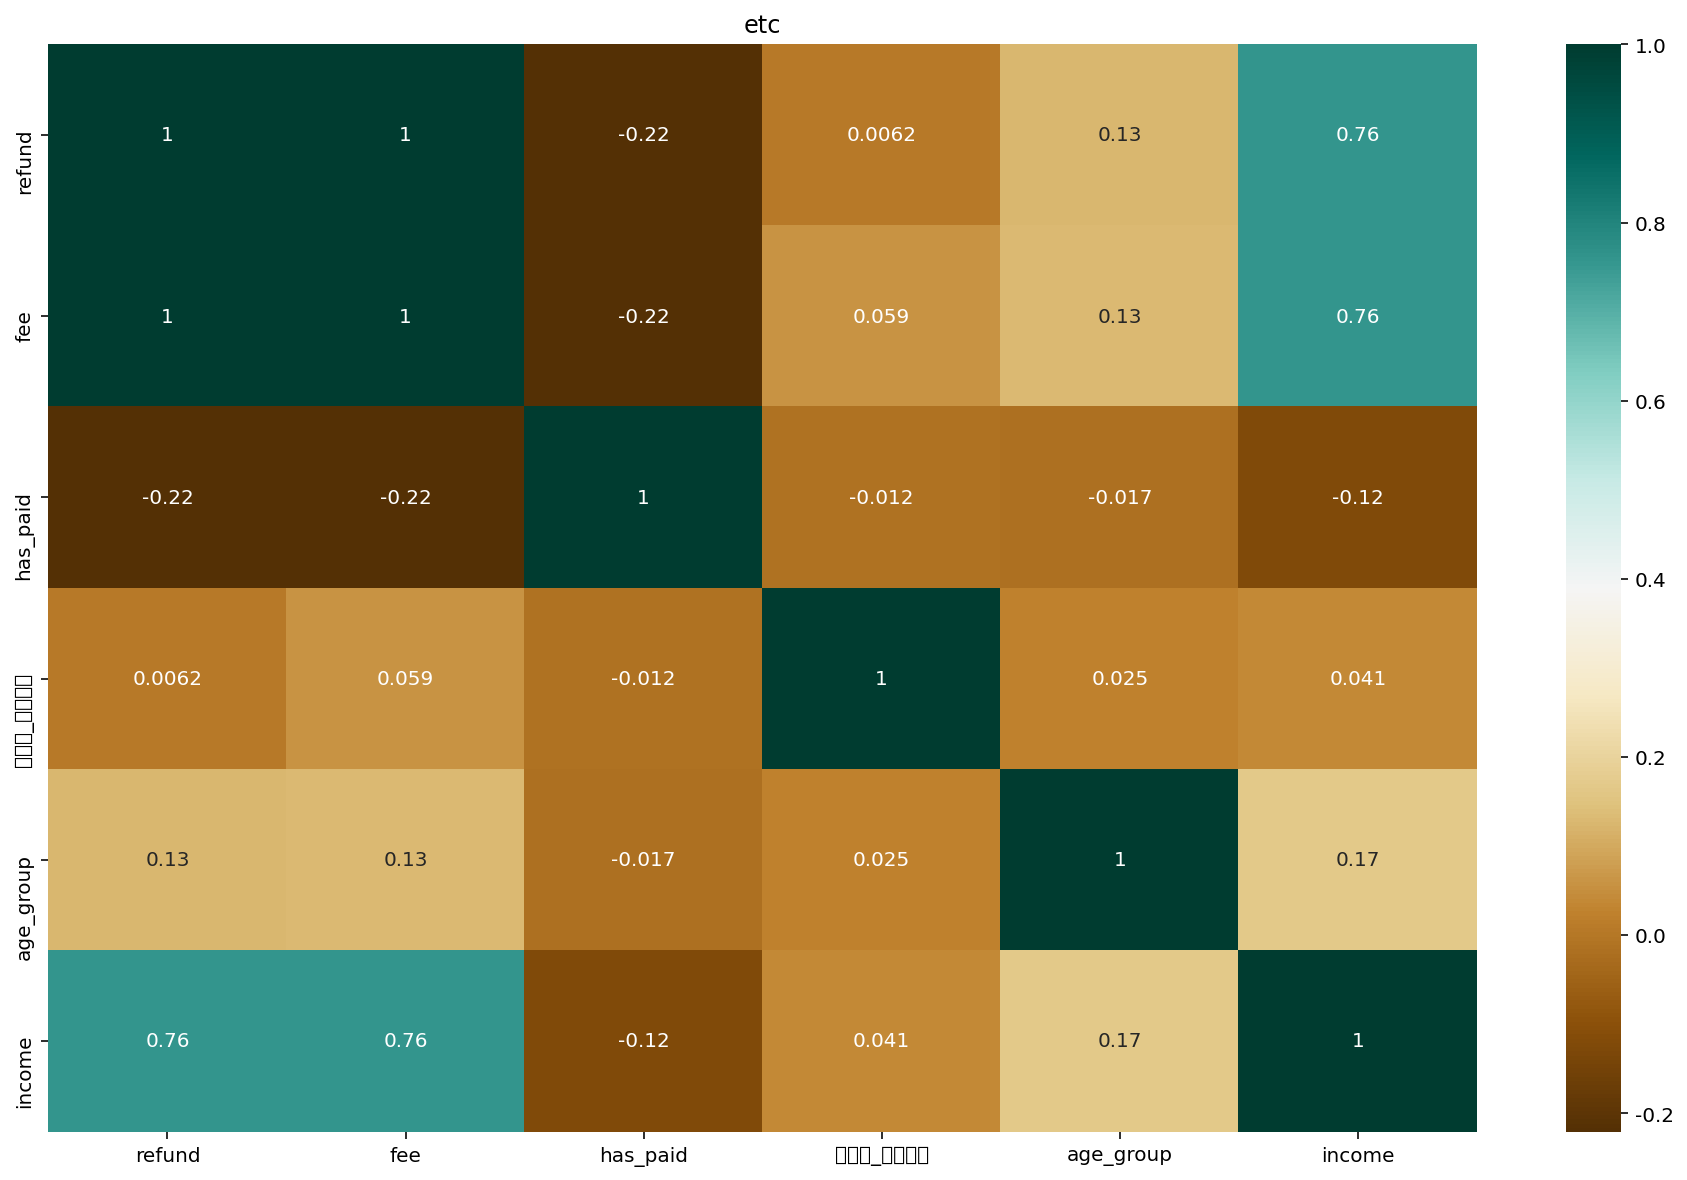

In [363]:

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))

heat_df = emp_df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율','age_group', 'income']]
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )
plt.title('emp')

fig, ax = plt.subplots(figsize=(16, 10))
heat_df2 = bus_df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율','age_group', 'income']]
sns.heatmap(heat_df2.corr(), cmap='BrBG', annot = True, cbar=True )
plt.title('bus')

fig, ax = plt.subplots(figsize=(16, 10))
heat_df3 = etc_df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율','age_group', 'income']]
sns.heatmap(heat_df3.corr(), cmap='BrBG', annot = True, cbar=True )
plt.title('etc')

plt.show()

etc_df
income 과 refund
income 과 fee
refund 와 fee



In [364]:
### 각 소득을 비율로 
df['income_emp'] = round(df['income_근로']/df['income'], 4) *100
df['income_bus'] = round(df['income_사업']/df['income'], 4) *100
df['income_etc'] = round(df['income_기타']/df['income'], 4) *100
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,0.00,100.00,0.00


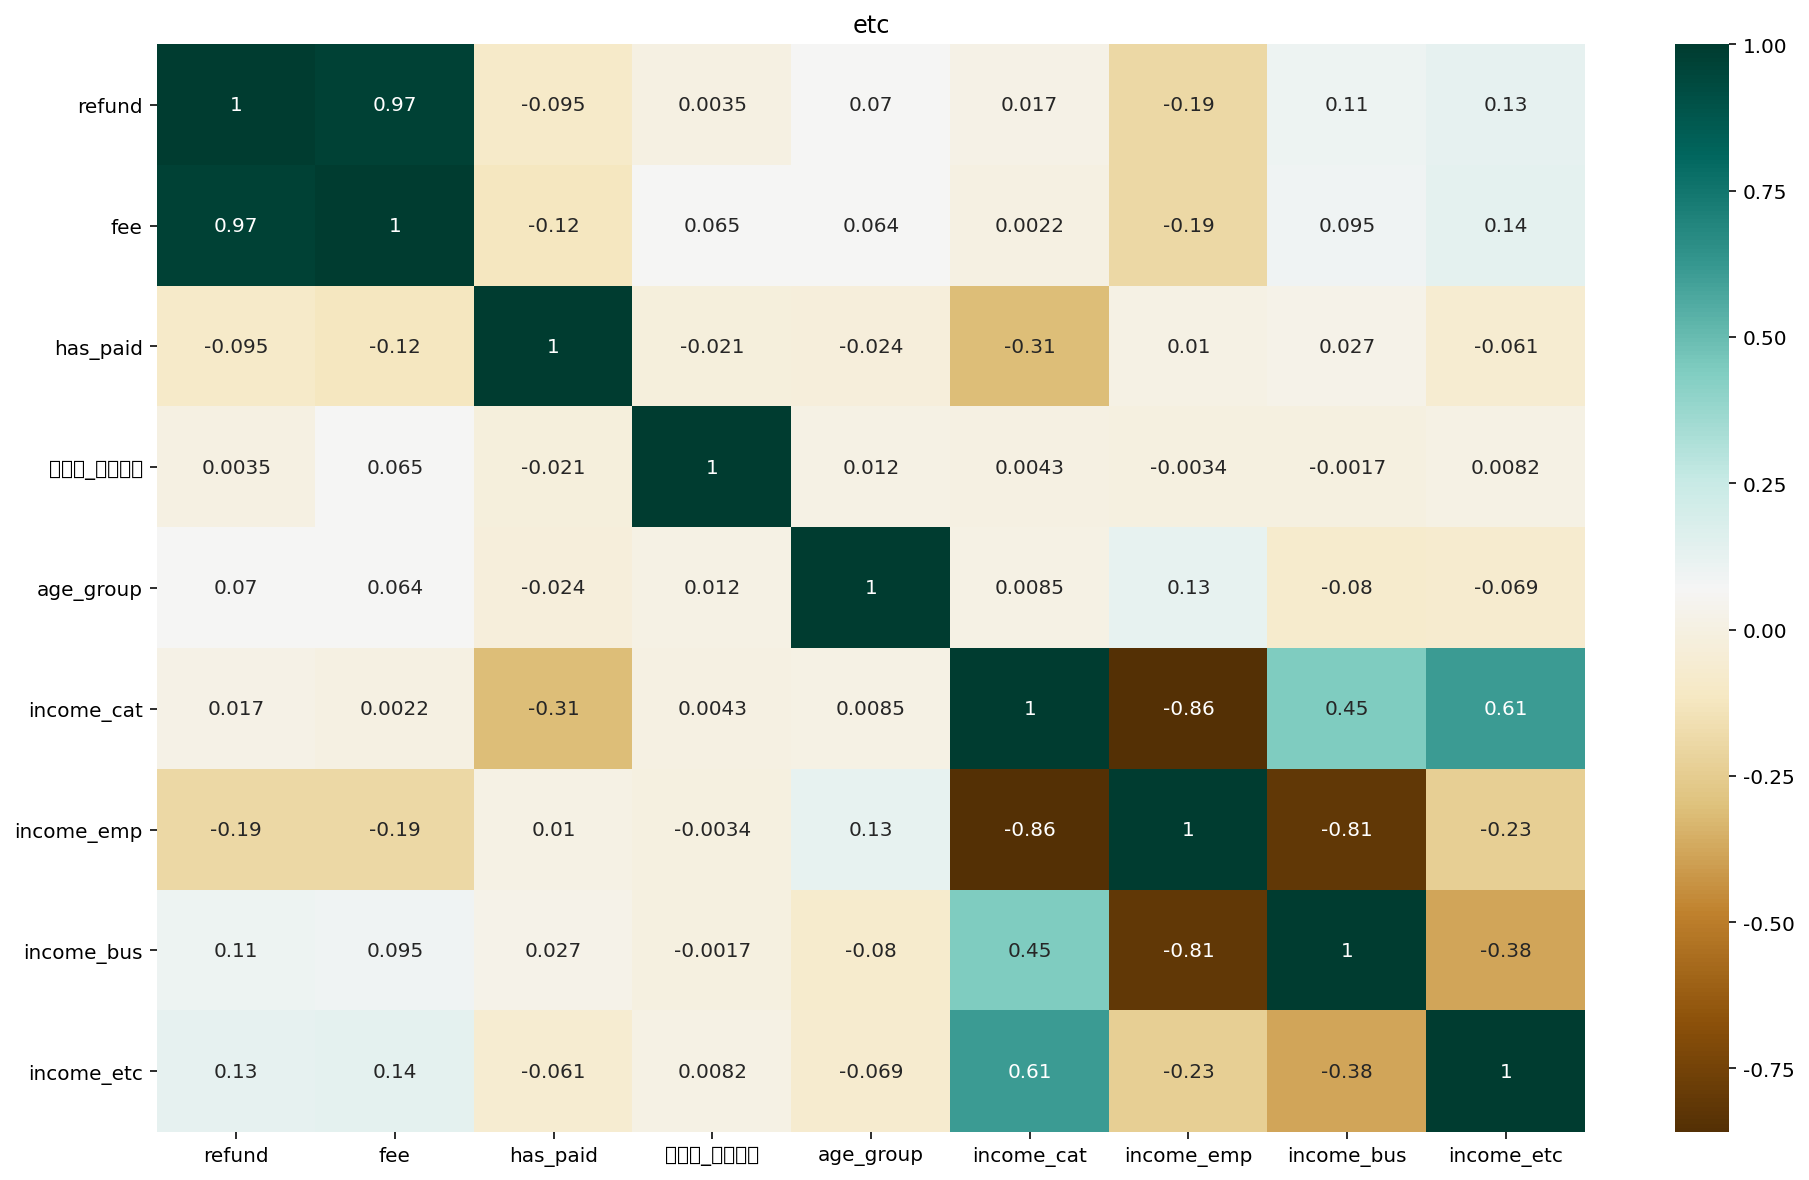

In [365]:
fig, ax = plt.subplots(figsize=(16, 10))
heat_df = df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율','age_group', 'income_cat','income_emp', 'income_bus', 'income_etc']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )
plt.title('etc')

plt.show()

In [366]:
### 결제 비율로 봤을 때, 사업 소득이 가장 높은 그룹이 결제 비율이 가장 높음.
print('근로',round(len(emp_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('사업',round(len(bus_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('기타',round(len(etc_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('소득 0 :',round(len(no_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)

근로 27.800000000000004
사업 41.61
기타 8.83
소득 0 : 21.759999999999998


In [367]:
## 이용자 결제 비율
len(df[df['has_paid']==0])/len(df) * 100

35.354303145471825

In [368]:
df['refund'].describe()
df[df['refund']>9.9000]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,0.00,100.00,0.00


In [369]:
(df['refund'] *0.1).sum()/ df['fee'].sum()

2.874317850769731

In [370]:
df['refund'].describe()

count    9.998500e+04
mean     2.083316e+05
std      3.057979e+05
min     -0.000000e+00
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      7.725000e+06
Name: refund, dtype: float64

In [371]:
print(len(df[df['refund'] >= 2.540000e+05]))
print(len(df[df['refund'] >= 9.900000e+04]))
print(len(df[df['refund'] >= 3.300000e+04]))


25043
50076
75018


In [372]:
df['fee'].describe()

count     99985.000000
mean       7248.035205
std       11927.183146
min         400.000000
25%         400.000000
50%        4300.000000
75%        8500.000000
max      307000.000000
Name: fee, dtype: float64

In [373]:
df['환급금_수수료율'].describe()

count    99985.00
mean          NaN
std           NaN
min          -inf
25%          1.83
50%          3.33
75%          3.94
max           inf
Name: 환급금_수수료율, dtype: float64

In [374]:
df['fee'].sum() / df['refund'].sum() *100
## 수수료 50%(중위값)  3.33
## 
## 전체 환급금 대비 수수료율 3.4791


3.4790863499393567

In [375]:
# len(df[df['refund'] == 0])  # 61
# len(df.query('환급금_수수료율 < 0 and has_paid == 0'))    #17
no_refund = df[df['refund'] == 0].index.tolist()
df = df[~df.index.isin(no_refund)]
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,0.00,100.00,0.00


In [376]:
df[df['fee']==df['fee'].max()]
df[df['환급금_수수료율']==df['환급금_수수료율'].max()]
## 수수료가 환급금보다 큰 경우....?

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc
83440,32.0,0,2019,4000.0,63800.0,1,7143000.0,14036000.0,0.0,1595.0,1,2,21179000.0,33.73,66.27,0.0


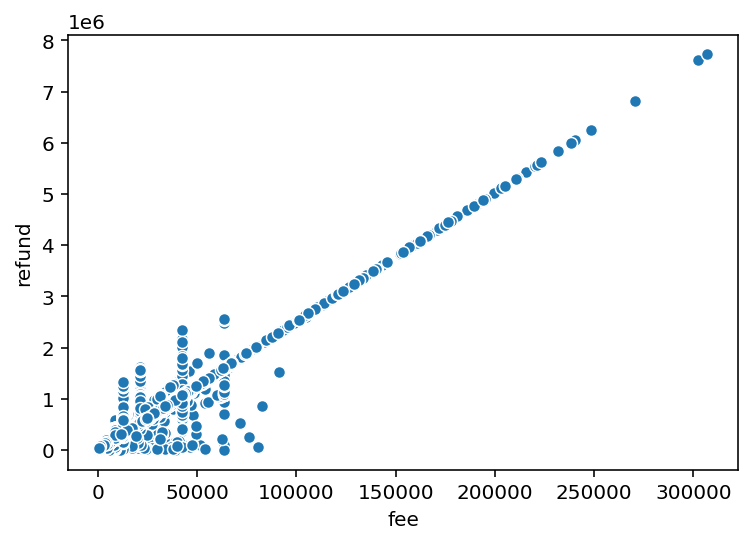

In [377]:
sns.scatterplot(data=df, x='fee', y = 'refund')
# sns.regplot(data=df, x='fee', y = 'refund')

In [378]:
#환급액이 많을 수록 결제를 많이할까?
df.describe() # 환급액 75% 2.540000e+05	
len(df.query('refund >= 2.540000e+05	 and has_paid == 1'))/len(df.query('refund >= 2.540000e+05	')) * 100 ## 58.5972 환급액 75% 이상중 결제율
len(df[df['has_paid']==1])/len(df) * 100 ## 전체 데이터 중에서 결제율 64.6559
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,0.00,100.00,0.00


In [379]:
# 수수료가 비싸질수록 결제를 안할까?
df.describe() # 수수료 75% 8500.000000	
# len(df.query('fee >= 8500.000000	 and has_paid == 1'))/len(df.query('fee >= 8500.000000	')) * 100 ## 59.4064 환급액 75% 이상중 결제율
# len(df.query('fee >= 4300.000000 and has_paid == 1'))/len(df.query('fee >= 4300.000000')) * 100 ## 62.8733 환급액 50% 이상중 결제율
len(df.query('fee >= 400.000000 and has_paid == 1'))/len(df.query('fee >= 400.000000')) * 100 ## 64.6559 환급액 25% 이상중 결제율
# len(df[df['has_paid']==1])/len(df) * 100 ## 전체 데이터 중에서 결제율 64.6559
# df

64.6561386653857

In [380]:
df['환급금_수수료율'] = round(df['fee']/df['refund'], 4) *100

In [381]:
# 수수료율이 높아질수록 결제를 안할까?
df.describe() # 수수료 75% 3.94
# len(df.query('환급금_수수료율 >= 3.94 and has_paid == 1'))/len(df.query('환급금_수수료율 >= 3.94	')) * 100 ## 55.1890 환급액 75% 이상중 결제율
# len(df.query('환급금_수수료율 >= 3.33 and has_paid == 1'))/len(df.query('환급금_수수료율 >= 3.33	')) * 100 ## 57.4656 환급액 50% 이상중 결제율
len(df.query('환급금_수수료율 >= 1.83 and has_paid == 1'))/len(df.query('환급금_수수료율 >= 1.83	')) * 100 ## 62.47276 환급액 50% 이상중 결제율
# len(df[df['has_paid']==1])/len(df) * 100 ## 전체 데이터 중에서 결제율 64.6559
# df

62.454499561601615

In [382]:
## 년도별 결제율
print(len(df15.query('has_paid == True'))/len(df15))
print(len(df16.query('has_paid == True'))/len(df16))
print(len(df17.query('has_paid == True'))/len(df17))
print(len(df18.query('has_paid == True'))/len(df18))
print(len(df19.query('has_paid == True'))/len(df19))
print(len(df20.query('has_paid == True'))/len(df20))

df15.fillna(0, inplace=True)
df16.fillna(0, inplace=True)
df17.fillna(0, inplace=True)
df18.fillna(0, inplace=True)
df19.fillna(0, inplace=True)
df20.fillna(0, inplace=True)

df15['환급금_수수료율'] = round(df15['fee']/df15['refund'], 4) *100
df16['환급금_수수료율'] = round(df16['fee']/df16['refund'], 4) *100
df17['환급금_수수료율'] = round(df17['fee']/df17['refund'], 4) *100
df18['환급금_수수료율'] = round(df18['fee']/df18['refund'], 4) *100
df19['환급금_수수료율'] = round(df19['fee']/df19['refund'], 4) *100
df20['환급금_수수료율'] = round(df20['fee']/df20['refund'], 4) *100
print('======환급금 수수료율_년도별_평균')
print(df15['환급금_수수료율'].mean())
print(df16['환급금_수수료율'].mean())
print(df17['환급금_수수료율'].mean())
print(df18['환급금_수수료율'].mean())
print(df19['환급금_수수료율'].mean())
print(df20['환급금_수수료율'].mean())

df20
## 2020 년 결제율이 떨어진 이유?
# 1. 손택스 (국세청 앱)에서 신청이 가능해짐

0.7105923694779116
0.6970241518113859
0.6976159167571894
0.6949797287151509
0.6948323017129696
0.48532256707881233
======환급금 수수료율_년도별_평균
-inf
nan
inf
inf
nan
3.3618756834048575


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
11,25.0,1,2020,753000.0,29800.0,0,0.0,0.0,1828000.0,3.96
15,27.0,0,2020,6000.0,400.0,1,3427000.0,33000.0,0.0,6.67
17,34.0,1,2020,116000.0,4300.0,0,55000.0,701000.0,0.0,3.71
19,22.0,0,2020,396000.0,15700.0,0,873000.0,2385000.0,0.0,3.96
21,48.0,1,2020,454000.0,17900.0,1,0.0,2737000.0,0.0,3.94
...,...,...,...,...,...,...,...,...,...,...
99962,32.0,0,2020,35000.0,400.0,1,18037000.0,88000.0,0.0,1.14
99964,25.0,1,2020,381000.0,14900.0,0,0.0,2296000.0,0.0,3.91
99976,34.0,0,2020,1248000.0,49300.0,1,0.0,13589000.0,0.0,3.95
99982,28.0,1,2020,94000.0,1700.0,1,10636000.0,0.0,85000.0,1.81


In [383]:
bus_df.fee.mean()

8773.489926090919

In [384]:
emp_df.fee.mean()

4446.077872174357

In [385]:
etc_df.fee.mean()

12854.326382819329

In [386]:
etc_df.query('income_근로 == 0 and income_사업 == 0')['fee'].mean()

11520.710917664128

In [387]:
etc_df.query('income_근로 != 0 or income_사업 != 0')['fee'].mean()
# 기타 소득에서 사업소득이나 근로소득이 0이 아닌 경우의 평균이 높음 -> 사업소득의 영향을 많이 받는 탓

15801.643286573146

In [393]:
df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,income_emp,income_bus,income_etc,fee_rat,fee_fix
count,99924.000000,99924.000000,9.992400e+04,99924.000000,99924.000000,9.992400e+04,9.992400e+04,9.992400e+04,99924.000000,99924.000000,99924.000000,9.992400e+04,90744.000000,90744.000000,90744.000000,99924.000000,99924.000000
mean,28.999520,2018.112786,2.084587e+05,7249.651735,0.646561,2.623583e+06,1.183215e+06,1.608188e+05,3.434262,1.207658,1.442016,3.967617e+06,33.797762,56.334545,9.867692,2.834433,7684.066963
std,7.768392,1.494707,3.058478e+05,11929.564466,0.478040,5.260854e+06,2.255232e+06,7.961644e+05,8.505295,1.634371,0.801015,5.654976e+06,41.740024,43.926259,26.592751,0.865654,12462.139466
min,15.000000,2015.000000,1.000000e+03,400.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.560000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,20.000000
25%,24.000000,2017.000000,3.300000e+04,400.000000,0.000000,0.000000e+00,3.100000e+04,0.000000e+00,1.830000,0.000000,1.000000,2.620000e+05,0.000000,5.320000,0.000000,2.000000,660.000000
50%,27.000000,2018.000000,9.900000e+04,4300.000000,1.000000,0.000000e+00,3.290000e+05,0.000000e+00,3.330000,1.000000,1.000000,1.441000e+06,0.000000,69.130000,0.000000,3.330000,3296.700000
75%,31.000000,2019.000000,2.540000e+05,8500.000000,1.000000,2.992000e+06,1.235000e+06,2.000000e+03,3.940000,1.000000,2.000000,5.804250e+06,83.090000,100.000000,0.620000,4.000000,10160.000000
max,81.000000,2020.000000,7.725000e+06,307000.000000,1.000000,1.823350e+08,3.993400e+07,6.281000e+07,1595.000000,6.000000,5.000000,1.866450e+08,100.000000,100.000000,100.000000,4.000000,309000.000000


### 결제 여부에 영향일 미치는 요인?

1. 환급액이 많을 수록? 결제를 많이 할까? X
- 환급액은 결제율에 큰 영향을 미치지 않음.

2. 수수료가 비싸지면 결제를 안할까?
환급액 75% 이상중 결제율 - 59.4064%  
환급액 50% 이상중 결제율 - 62.8733% 
환급액 25% 이상중 결제율 - 64.6559% 
전체 데이터 중에서 결제율 - 64.6559% 

3. 수수료율이 높아지면 결제를 안할까?

수수료율 75% 3.94 
환급액 75% 이상중 결제율 - 55.1890%  
환급액 50% 이상중 결제율 - 57.4656% 
환급액 50% 이상중 결제율 - 62.47276%  
전체 데이터 중에서 결제율 - 64.6559% 


### 수수료 총 합계를 늘릴 수 있는 방법?

1. 수수료율 상향 조정
- 수수료율 재설정

2. 수수료율 하향 조정
- 수수료율 하향 조정으로 더 많은 결제를 유도

3. 결제량 향상 
타겟 :
-  연령대 20~30 대
    1. 타겟 집중 마케팅
    2. 이용 프로세스 개선
    - 현재 수수료 선 결제 -> 환급 신청 -> 환급 순으로 이루어짐.
    => 프로세스 개선 불가능 
    
    - *"삼쩜삼에서는 종합소득세 신고를 담당하고, 환급은 고객님의 관할 세무서(국세)와 시,군,구청(지방세)에서 담당하기 때문에 환급금에서 수수료를 차감할 수 없습니다."*

   3. 어플 출시...?
   - 2020년부터 홈택스의 어플인 손택스에서 미수령 환급금을 받을 수 있는 서비스를 제공 => 간단하게 이름과 주민등록번호만 입력 후 조회가능
   - 동일하게 최근 5년간의 미수령 환급액 조회 가능
   하지만 삼쩜삼의 경우 따로 어플은 없고, 사이트를 통해 신청해야함.
   


##### 지난 번 
1. 환급액이 많을 수록? 결제를 많이 할까? X
2. 연령대에 따른 이용율 및 결제율
-  이용 연령대가 주로 20~30대, 실제 결제 인원의 80% 이상.

3. 환급액이 마이너스(-) 인데도 결제 => 환급금이 마이너스 인 경우 혹은 환급을 받지 못하는 경우 수수료를 받지 않는 정책
4. 환급 절차가 수수료를 먼저 결제하고 환급을 받기 때문...? => 프로세스를 바꿔야함? X

